This notebook was created for image classification project using deep learning on Cat and Dog dataset

Author Name: **Sania Siddiqui**

About Data:The Cat and Dog Classification dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or a cat. This dataset is provided as a subset of photos from a much larger dataset of approximately 25 thousands.The dataset contains 24,998 images, split into 12,499 Cat images and 12,499 Dog images

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import PIL
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)


Load Data

In [2]:
root_path = r"C:\Users\sania.siddiqui\Downloads\PetImages"  # Update this path to the correct location of your dataset
input_path = []
label = []

for class_name in os.listdir(root_path):
    for path in os.listdir(os.path.join(root_path, class_name)):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join(root_path, class_name, path))

In [3]:
print(input_path[0], label[0])

C:\Users\sania.siddiqui\Downloads\PetImages\Cat\0.jpg 0


In [4]:
len(input_path), len(label)

(24998, 24998)

In [5]:
df = pd.DataFrame({"Images_path": input_path,"Label": label})
df['Label'] = df['Label'].astype('str')
df.head()

,Images_path,Label
0,C:\Users\sania.siddiqui\Downloads\PetImages\Ca...,0
1,C:\Users\sania.siddiqui\Downloads\PetImages\Ca...,0
2,C:\Users\sania.siddiqui\Downloads\PetImages\Ca...,0
3,C:\Users\sania.siddiqui\Downloads\PetImages\Ca...,0
4,C:\Users\sania.siddiqui\Downloads\PetImages\Ca...,0


In [6]:
for i in df['Images_path']:
    if '.jpg' not in i:
        print(i)

In [7]:
l = []
for image in df['Images_path']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)

In [8]:
# to display grid of images
import random

plt.figure(figsize=(10,10))
temp = df[df['Label']==1]['Images_path']
start = random.randint(0, len(temp))
print(start)
files = temp[start:start+10]

for index, file in enumerate(files):
    plt.subplot(2,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

0


<Figure size 1000x1000 with 0 Axes>

In [9]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['Label']==0]['Images_path']
start = random.randint(0, len(temp))
files = temp[start:start+10]

for index, file in enumerate(files):
    plt.subplot(2,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

Splitting data

In [10]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [11]:
# training data
train_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation generator
val_generator = ImageDataGenerator(
    rescale=1.0/255
)


In [12]:
#train and validation iterator
train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='Images_path', 
    y_col='Label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='Images_path', 
    y_col='Label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary')

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Modelling CNN

In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,153 (9.92 MB)

 Trainable params: 2,601,153 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_iterator,
    epochs=2,
    validation_data=val_iterator
)

Epoch 1/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 828s 20s/step - accuracy: 0.5198 - loss: 0.7124 - val_accuracy: 0.5298 - val_loss: 0.7011
Epoch 2/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 651s 16s/step - accuracy: 0.6131 - loss: 0.6548 - val_accuracy: 0.6938 - val_loss: 0.5867


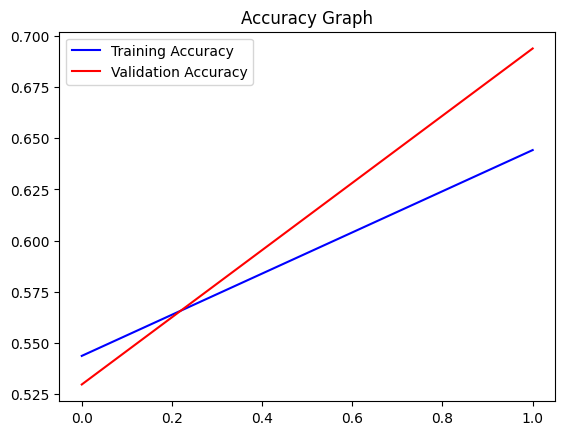

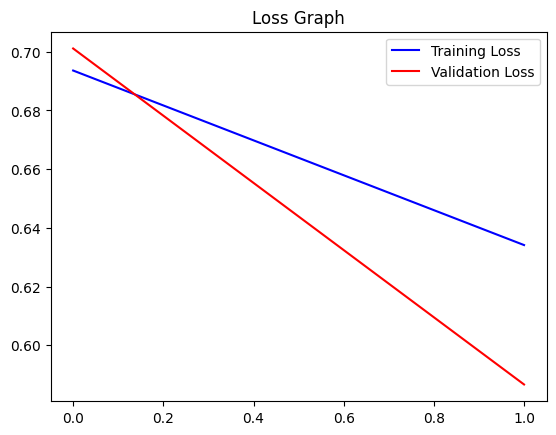

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()